In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import sys

import scipy.stats as stats # qqplot에 사용

In [2]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
matplotlib.rcParams['axes.unicode_minus'] = False
from statsmodels.graphics.mosaicplot import mosaic

plt.style.use("ggplot")


In [3]:
#분석 관련
from scipy.stats import chi2_contingency

In [11]:
DataFrame=pd.read_csv("../bmc.csv")
DataFrame

,Unnamed: 0,origin_name,color,residue,turbidity,label
0,0,1301837407-1,0,0,0,0
1,1,1411450810-1,0,0,0,0
2,2,1651193832-1,0,0,0,0
3,3,2077897036-1,0,0,0,0
4,4,290980310-1,0,1,0,0
...,...,...,...,...,...,...
1078,1078,PANO_20200407_221523,2,2,1,2
1079,1079,PANO_20200407_221527,2,2,1,2
1080,1080,PANO_20200818_174909,2,2,1,2
1081,1081,PANO_20210330_062718,2,2,1,2


# 카이제곱 검정

In [12]:
feat_crosstab=pd.crosstab(DataFrame['color'],DataFrame['label'])
feat_crosstab_res=chi2_contingency(feat_crosstab)
print('Chi2 Statistic: {}, p-value: {}'.format(feat_crosstab_res[0], feat_crosstab_res[1]))

Chi2 Statistic: 822.756896468155, p-value: 9.034537358655098e-177


In [13]:
feat_crosstab=pd.crosstab(DataFrame['residue'],DataFrame['label'])
feat_crosstab_res=chi2_contingency(feat_crosstab)
print('Chi2 Statistic: {}, p-value: {}'.format(feat_crosstab_res[0], feat_crosstab_res[1]))

Chi2 Statistic: 1011.3003119398005, p-value: 1.2695086648555491e-217


In [14]:
feat_crosstab=pd.crosstab(DataFrame['turbidity'],DataFrame['label'])
feat_crosstab_res=chi2_contingency(feat_crosstab)
print('Chi2 Statistic: {}, p-value: {}'.format(feat_crosstab_res[0], feat_crosstab_res[1]))

Chi2 Statistic: 634.23065928036, p-value: 1.8991628674420623e-138



- 검정 결과 모두 label에 대해 유의한 feature.
- residue, color, turbidity 순으로 유의하다.

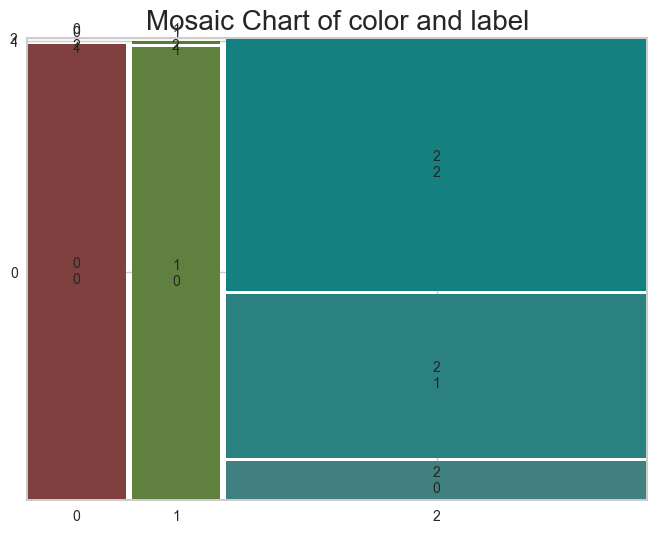

In [15]:
#Qsofa 조사

plt.rcParams["figure.figsize"]=(8,6)

mosaic(         DataFrame,
                ['color','label'],
                #label_rotation=True
                gap=0.01,
                )


plt.title('Mosaic Chart of color and label', fontsize=20)



plt.show()
plt.rcParams["figure.figsize"]=(6.0,4.0)

- color가 0,1일 때 거의 모두 라벨이 0이다. 하지만 2일때는 셋다 구별을 못한다.

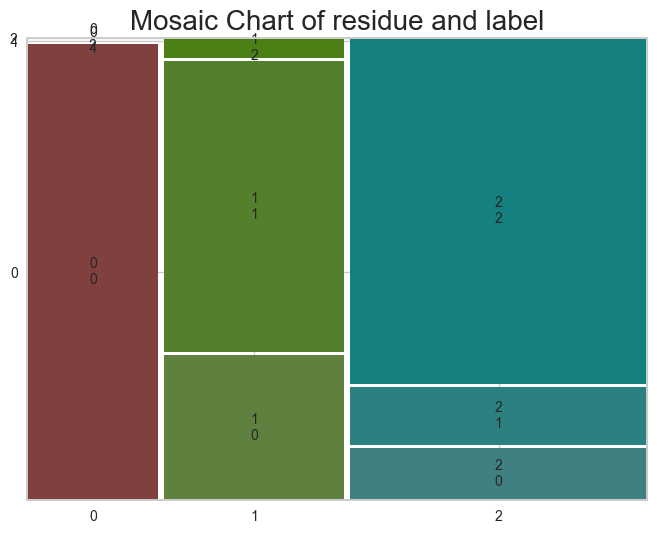

In [16]:
#Qsofa 조사

plt.rcParams["figure.figsize"]=(8,6)

mosaic(         DataFrame,
                ['residue','label'],
                #label_rotation=True
                gap=0.01,
                )


plt.title('Mosaic Chart of residue and label', fontsize=20)



plt.show()
plt.rcParams["figure.figsize"]=(6.0,4.0)

- residue
    - 0일 때 label은 무조건 0
    - 1일 때 0과 1
    - 2일 때 2가 다수

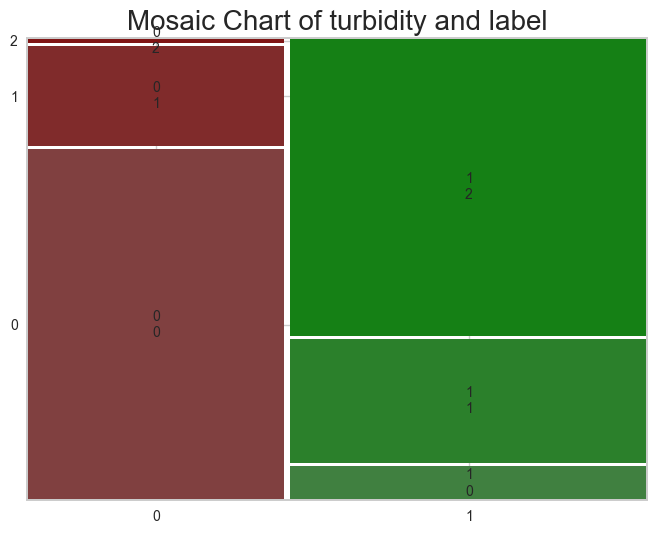

In [17]:
#Qsofa 조사

plt.rcParams["figure.figsize"]=(8,6)

mosaic(         DataFrame,
                ['turbidity','label'],
                #label_rotation=True
                gap=0.01,
                )


plt.title('Mosaic Chart of turbidity and label', fontsize=20)



plt.show()
plt.rcParams["figure.figsize"]=(6.0,4.0)

- turbidity
    - 0일때 0과 1로 구성
    - 1일때 2가 다수

# AUTOML

env : pycaret

In [8]:
import pycaret

In [4]:
DataFrame=pd.read_csv("../bmc.csv")
DataFrame

,Unnamed: 0,origin_name,color,residue,turbidity,label
0,0,1301837407-1,0,0,0,0
1,1,1411450810-1,0,0,0,0
2,2,1651193832-1,0,0,0,0
3,3,2077897036-1,0,0,0,0
4,4,290980310-1,0,1,0,0
...,...,...,...,...,...,...
1078,1078,PANO_20200407_221523,2,2,1,2
1079,1079,PANO_20200407_221527,2,2,1,2
1080,1080,PANO_20200818_174909,2,2,1,2
1081,1081,PANO_20210330_062718,2,2,1,2


In [6]:
DataFrame=DataFrame[['color','residue','turbidity','label']]

In [7]:
DataFrame

,color,residue,turbidity,label
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
1078,2,2,1,2
1079,2,2,1,2
1080,2,2,1,2
1081,2,2,1,2


In [9]:
from pycaret.classification import *
class_test_1 = setup(data=DataFrame,
                   target='label',
                   train_size= 0.8,
                   fold=5)

,Description,Value
0,session_id,7223
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1083, 4)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9134,0.9596,0.9027,0.9152,0.9134,0.8678,0.8687,0.9060
knn,K Neighbors Classifier,0.9134,0.9387,0.9027,0.9152,0.9134,0.8678,0.8687,0.3440
dt,Decision Tree Classifier,0.9134,0.9589,0.9027,0.9152,0.9134,0.8678,0.8687,0.2720
svm,SVM - Linear Kernel,0.9134,0.0000,0.9027,0.9152,0.9134,0.8678,0.8687,0.0060
rf,Random Forest Classifier,0.9134,0.9589,0.9027,0.9152,0.9134,0.8678,0.8687,0.0420
et,Extra Trees Classifier,0.9134,0.9589,0.9027,0.9152,0.9134,0.8678,0.8687,0.0340
xgboost,Extreme Gradient Boosting,0.9134,0.9595,0.9027,0.9152,0.9134,0.8678,0.8687,0.0640
lightgbm,Light Gradient Boosting Machine,0.9134,0.9595,0.9027,0.9152,0.9134,0.8678,0.8687,0.0240
catboost,CatBoost Classifier,0.9134,0.9592,0.9027,0.9152,0.9134,0.8678,0.8687,0.3740
gbc,Gradient Boosting Classifier,0.9122,0.9597,0.9016,0.9141,0.9122,0.8660,0.8670,0.0380
